# Simulated Credit Card Fraud Dataset — EDA & Cleaning


In [1]:
from google.colab import files
uploaded = files.upload()
csv_path = list(uploaded.keys())[0]
csv_path = 'fraudTrain.csv'
print('csv_path =', csv_path)


Saving fraudTrain.csv to fraudTrain.csv
csv_path = fraudTrain.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import hashlib
import os
from datetime import datetime
%matplotlib inline
print('matplotlib', matplotlib.__version__)
plt.rcParams['figure.facecolor'] = 'white'


matplotlib 3.10.0


In [3]:
# Load data
if not os.path.exists(csv_path):
    print('File not found:', csv_path)
    print('Upload the file or set the correct csv_path')
else:
    df = pd.read_csv(csv_path, low_memory=False)
    print('Loaded:', csv_path, 'shape=', df.shape)
    display(df.head())


Loaded: fraudTrain.csv shape= (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Basic overview
if 'df' in globals():
    print('Columns:', len(df.columns))
    print(df.columns.tolist())
    display(df.dtypes.value_counts())
    display(df.isna().sum().sort_values(ascending=False).head(20))
    print('Duplicate rows:', df.duplicated().sum())


Columns: 23
['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


,count
object,12
int64,6
float64,5


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


Duplicate rows: 0


In [5]:
# Parse datetime and ensure numeric types
if 'df' in globals():
    df.columns = [c.strip() for c in df.columns]
    if 'trans_date_trans_time' in df.columns:
        df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
        print('trans_datetime parsed, nulls:', df['trans_datetime'].isna().sum())
    if 'amt' in df.columns:
        df['amt'] = pd.to_numeric(df['amt'], errors='coerce')
    essential = [c for c in ['trans_datetime','amt','is_fraud'] if c in df.columns]
    print('Essential columns:', essential)
    df = df.dropna(subset=essential)
    print('After dropping missing essential rows, shape=', df.shape)


trans_datetime parsed, nulls: 0
Essential columns: ['trans_datetime', 'amt', 'is_fraud']
After dropping missing essential rows, shape= (1296675, 24)


In [6]:
# Anonymize PII
if 'df' in globals():
    def sha1_series(s):
        return s.fillna('').astype(str).apply(lambda x: hashlib.sha1(x.encode()).hexdigest())
    if 'cc_num' in df.columns:
        df['cc_hash'] = sha1_series(df['cc_num'])
    if 'first' in df.columns and 'last' in df.columns:
        df['name_hash'] = sha1_series(df['first'].astype(str)+'|'+df['last'].astype(str))
    drop_cols = [c for c in ['cc_num','first','last','street'] if c in df.columns]
    if drop_cols:
        df = df.drop(columns=drop_cols)
        print('Dropped PII columns:', drop_cols)
    display(df.head())


Dropped PII columns: ['cc_num', 'first', 'last', 'street']


,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_datetime,cc_hash,name_hash
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,4378595d17588e155b410e6f6104a5728d0139a9,4d295bde8a21c40f41bca105245b49b12d854671
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,27ab8382f0ffc2c9ba0f93b6c74c40ce25fe9e03,8de7c18e1ff279f378000e2bd6e93357ee7c7af3
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,4b199fb65286b443acae2bc367dac9f857c2a478,c7020a802f70c78a700f0ffc56bb1c5c54e9427b
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,c6ec9573e4a875e626e122cd6f9e1b9bc3962873,3c5afb3602bf16ec64325faed1987b55c4740105
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,4bdec7b2564c6b9a57d6d219ef64102dda2819f2,d434d8feb97152ea86eec996384ce4316ec39a95


In [7]:
# Feature engineering: age, time parts, log amount, counts, distance
if 'df' in globals():
    if 'dob' in df.columns:
        df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
        df['age'] = ((df['trans_datetime'] - df['dob']).dt.days / 365.25)
    df['trans_year'] = df['trans_datetime'].dt.year
    df['trans_month'] = df['trans_datetime'].dt.month
    df['trans_day'] = df['trans_datetime'].dt.day
    df['trans_hour'] = df['trans_datetime'].dt.hour
    df['trans_dow'] = df['trans_datetime'].dt.dayofweek
    df['amt_log1p'] = np.log1p(df['amt'].astype(float))
    if 'cc_hash' in df.columns:
        df['cust_tx_count'] = df.groupby('cc_hash')['trans_datetime'].transform('count')
    if 'merchant' in df.columns:
        df['merchant_tx_count'] = df.groupby('merchant')['trans_datetime'].transform('count')
    if set(['lat','long','merch_lat','merch_long']).issubset(df.columns):
        from math import radians, cos, sin, asin, sqrt
        def haversine(lon1, lat1, lon2, lat2):
            lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * asin(sqrt(a))
            return 6371 * c
        df['cust_merch_distance_km'] = df.apply(lambda r: haversine(r['long'], r['lat'], r['merch_long'], r['merch_lat']), axis=1)
    display(df[['trans_datetime','amt','amt_log1p','trans_hour','trans_dow']].head())


,trans_datetime,amt,amt_log1p,trans_hour,trans_dow
0,2019-01-01 00:00:18,4.97,1.786747,0,1
1,2019-01-01 00:00:44,107.23,4.684259,0,1
2,2019-01-01 00:00:51,220.11,5.398660,0,1
3,2019-01-01 00:01:16,45.00,3.828641,0,1
4,2019-01-01 00:03:06,41.96,3.760269,0,1


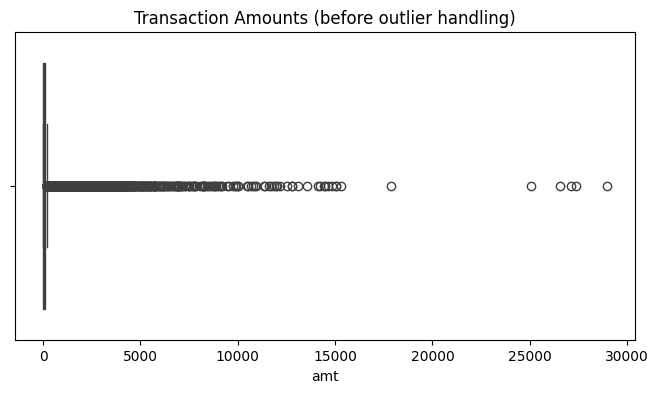

Outlier threshold (99th percentile): 545.99


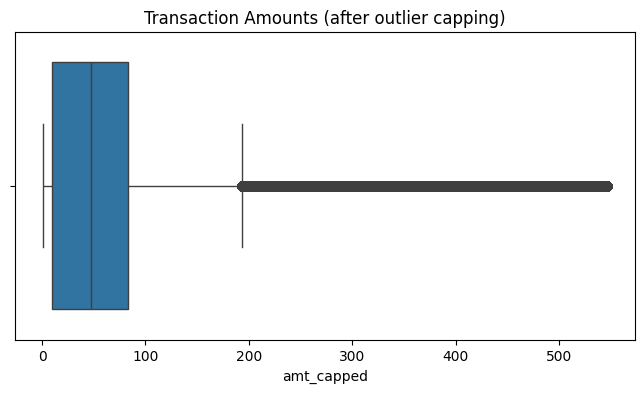

In [8]:
# Outlier detection and handling for transaction amount
import seaborn as sns

if 'df' in globals() and 'amt' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['amt'])
    plt.title("Transaction Amounts (before outlier handling)")
    plt.show()

    # Define outlier threshold
    threshold = df['amt'].quantile(0.99)
    print(f"Outlier threshold (99th percentile): {threshold:.2f}")

    # Cap extreme values at threshold
    df['amt_capped'] = np.where(df['amt'] > threshold, threshold, df['amt'])
    df['amt_log1p_capped'] = np.log1p(df['amt_capped'])

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['amt_capped'])
    plt.title("Transaction Amounts (after outlier capping)")
    plt.show()


In [9]:
# Handle duplicates and missing values
if 'df' in globals():
    print('Duplicates before:', df.duplicated().sum())
    df = df.drop_duplicates().reset_index(drop=True)
    print('Duplicates after drop:', df.duplicated().sum())
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for c in num_cols:
        if df[c].isna().sum()>0:
            df[c] = df[c].fillna(df[c].median())
    print('Filled numeric nulls with median where present')


Duplicates before: 0
Duplicates after drop: 0
Filled numeric nulls with median where present


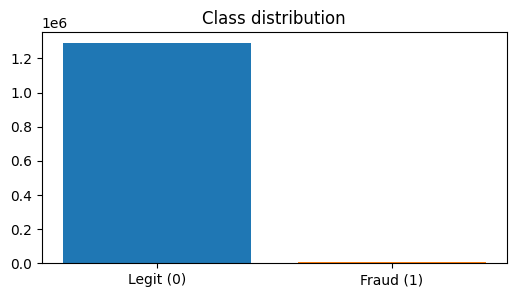

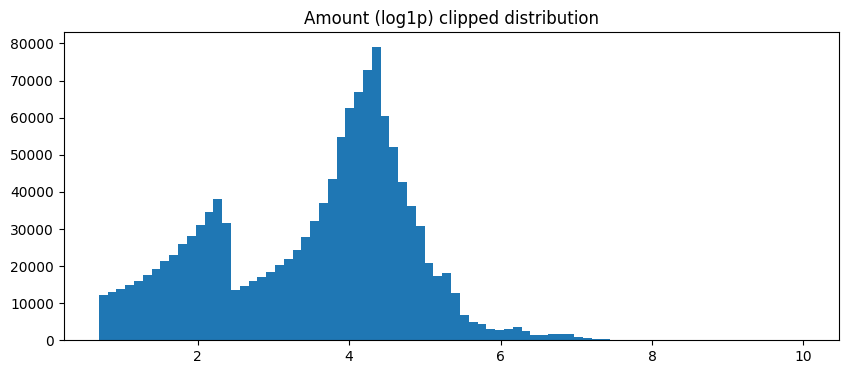

In [10]:
# Visualizations: class balance and transaction amounts
if 'df' in globals():
    if 'is_fraud' in df.columns:
        counts = df['is_fraud'].value_counts()
        plt.figure(figsize=(6,3))
        plt.bar(['Legit (0)','Fraud (1)'], counts.tolist(), color=['tab:blue','tab:orange'])
        plt.title('Class distribution')
        plt.show()
        plt.figure(figsize=(10,4))
        plt.hist(df['amt_log1p'].clip(0,10), bins=80)
        plt.title('Amount (log1p) clipped distribution')
        plt.show()


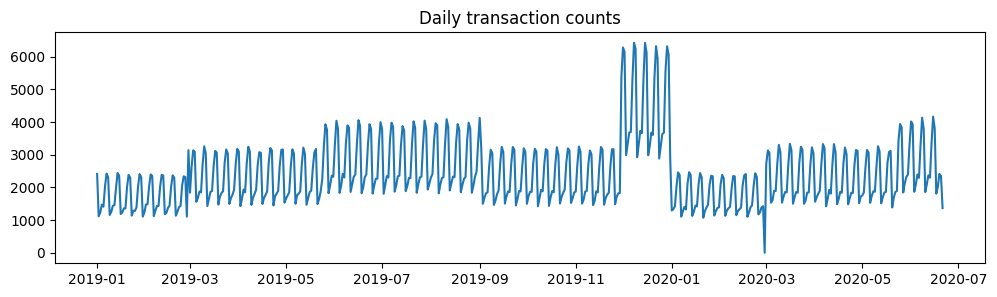

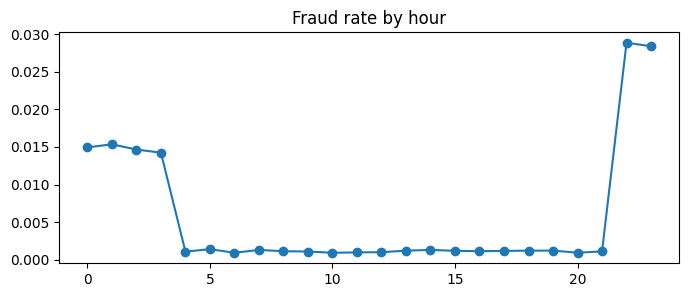

In [11]:
# Transactions over time (daily) and fraud rate by hour
if 'df' in globals():
    df_daily = df.set_index('trans_datetime').resample('D').size()
    plt.figure(figsize=(12,3))
    plt.plot(df_daily.index, df_daily.values)
    plt.title('Daily transaction counts')
    plt.show()
    if 'is_fraud' in df.columns:
        hr = df.groupby('trans_hour')['is_fraud'].mean()
        plt.figure(figsize=(8,3))
        plt.plot(hr.index, hr.values, marker='o')
        plt.title('Fraud rate by hour')
        plt.show()


In [12]:
# Fraud vs Legit distribution
if 'is_fraud' in df.columns:
    counts = df['is_fraud'].value_counts()
    total = len(df)
    fraud_count = counts.get(1, 0)
    legit_count = counts.get(0, 0)
    fraud_ratio = fraud_count / total * 100

    print("Total transactions:", total)
    print("Legit (0):", legit_count)
    print("Fraud (1):", fraud_count)
    print(f"Fraud ratio: {fraud_ratio:.4f}%")

else:
    print("Column 'is_fraud' not found in dataframe.")


Total transactions: 1296675
Legit (0): 1289169
Fraud (1): 7506
Fraud ratio: 0.5789%


,mean,count
category,,
shopping_net,0.017561,97543
misc_net,0.014458,63287
grocery_pos,0.014098,123638
shopping_pos,0.007225,116672
gas_transport,0.004694,131659
misc_pos,0.003139,79655
grocery_net,0.002948,45452
travel,0.002864,40507
entertainment,0.002478,94014


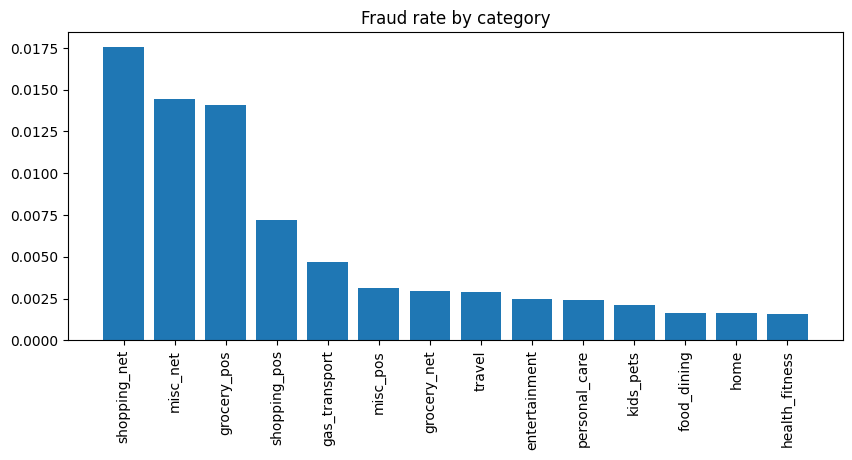

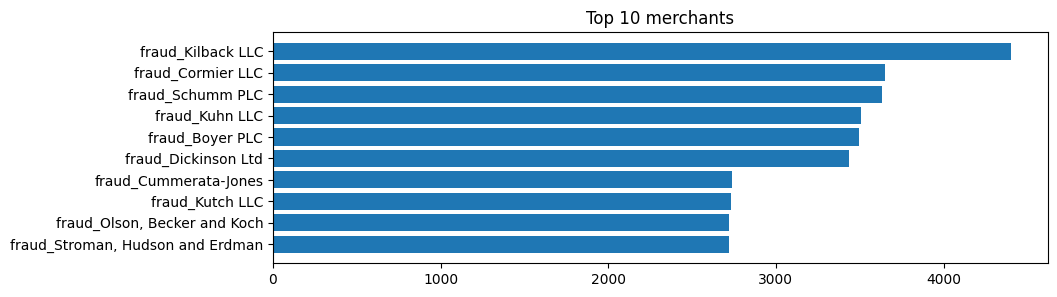

In [13]:
# Fraud rate by category & top merchants
if 'df' in globals():
    if 'category' in df.columns and 'is_fraud' in df.columns:
        cat = df.groupby('category')['is_fraud'].agg(['mean','count']).sort_values('mean', ascending=False)
        display(cat.head(20))
        plt.figure(figsize=(10,4))
        plt.bar(cat.index, cat['mean'])
        plt.xticks(rotation=90)
        plt.title('Fraud rate by category')
        plt.show()
    if 'merchant' in df.columns:
        topm = df['merchant'].value_counts().nlargest(10)
        plt.figure(figsize=(10,3))
        plt.barh(topm.index[::-1], topm.values[::-1])
        plt.title('Top 10 merchants')
        plt.show()


,is_fraud
is_fraud,1.000000
amt_capped,0.271105
amt,0.219404
amt_log1p,0.120439
amt_log1p_capped,0.107715
cust_tx_count,0.054882
trans_hour,0.013799
trans_month,0.012409
age,0.012270
merchant_tx_count,0.007968


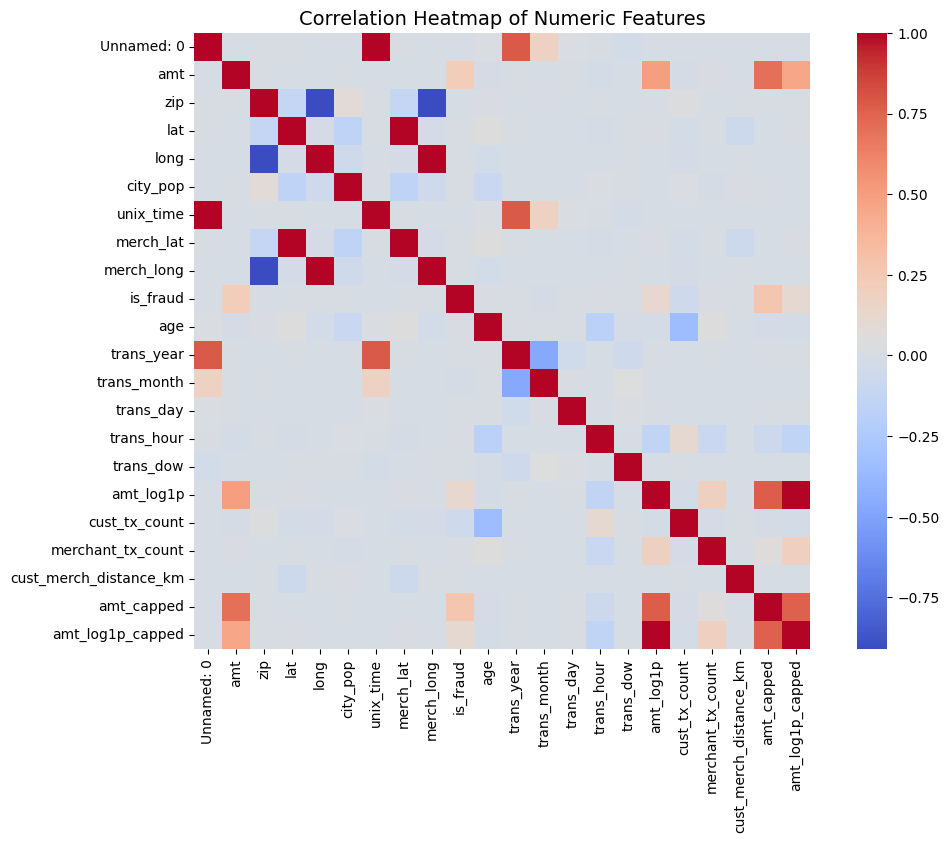

In [14]:
# Correlations of numeric features with is_fraud (top 15)
if 'df' in globals() and 'is_fraud' in df.columns:
    num = df.select_dtypes(include=[np.number])
    corr_target = num.corr()['is_fraud'].abs().sort_values(ascending=False).head(15)
    display(corr_target)

# Full correlation heatmap (numeric only)
import seaborn as sns

if 'df' in globals() and 'is_fraud' in df.columns:
    num = df.select_dtypes(include=[np.number])   # keep only numeric columns
    corr = num.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr,
                cmap='coolwarm',
                annot=False,
                fmt=".2f",
                cbar=True,
                square=True)
    plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
    plt.show()
else:
    print("Dataframe not loaded or 'is_fraud' missing.")


In [15]:
# Save cleaned dataset
if 'df' in globals():
    out = 'simulated_creditcard_cleaned.csv'
    df.to_csv(out, index=False)
    print('Saved cleaned CSV to', out)
else:
    print('No dataframe to save. Load the CSV file first.')


Saved cleaned CSV to simulated_creditcard_cleaned.csv



The cleaned CSV is saved as `simulated_creditcard_cleaned.csv`._